# Admission Prediction Using Random Forest Regression Using Principle Component  Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df)
print('\n--------------------\n')
df.info()

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
x = df.iloc[:,1:8].values
y = df.iloc[:,-1].values
print(x)
print('\n\n\n')
print(y)

[[337.   118.     4.   ...   4.5    9.65   1.  ]
 [324.   107.     4.   ...   4.5    8.87   1.  ]
 [316.   104.     3.   ...   3.5    8.     1.  ]
 ...
 [330.   120.     5.   ...   5.     9.56   1.  ]
 [312.   103.     4.   ...   5.     8.43   0.  ]
 [327.   113.     4.   ...   4.5    9.04   0.  ]]




[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x = pca.fit_transform(x)
ev = pca.explained_variance_ratio_
print(ev)

[9.29867063e-01 5.76314716e-02 7.07779605e-03 2.37674260e-03
 1.62317908e-03 9.78376087e-04 4.45371526e-04]


In [5]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size=0.2,random_state=0)

In [6]:
# Traing the model using Random Forest Regression Algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10,random_state=58)
rfr.fit(x_tr,y_tr)

RandomForestRegressor(n_estimators=10, random_state=58)

In [7]:
y_pre = rfr.predict(x_te)

In [8]:
# Checking for the error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_te,y_pre)
mse = mean_squared_error(y_te,y_pre)
rmse = np.sqrt(mse)
r2 = r2_score(y_te,y_pre)
print('Mean absolute error = ' + str(mae))
print('Mean squared error = ' + str(mse))
print('Root mean squared error = ' + str(rmse))
print('Goodness of fit(R2_score) = '+ str(r2))

Mean absolute error = 0.05177
Mean squared error = 0.005263980000000001
Root mean squared error = 0.0725532907592757
Goodness of fit(R2_score) = 0.7250139911221469


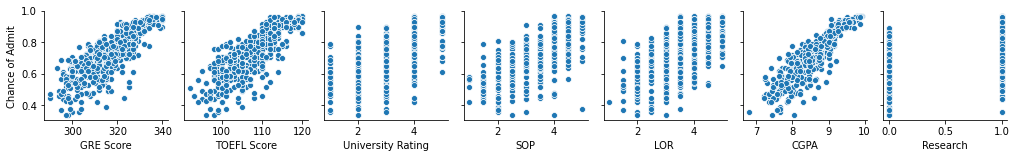

In [9]:
#Graphical representation of Dataset
import seaborn as sns
sns.pairplot(df,x_vars=df.columns[1:-1],y_vars=['Chance of Admit '],height=2)



# Admission Prediction

In [ ]:
n = int(input('Press 1 to check your chance of admit: '))
while n == 1:    
    gre = int(input('Enter your GRE Score(Out of 350): '))
    toefl = int(input('Enter your TOEFL Score(Out of 120): '))
    uni_rate = int(input('Enter your University Rating(Out of 5): '))
    sop = float(input('SOP(Max 5): '))
    lor = float(input('LOR(Max 5): '))
    cgpa = float(input('Undergraduate GPA ( out of 10 ): '))
    research = int(input('Research Experience ( either 0 or 1 )'))

    in_array = [[gre, toefl,uni_rate, sop, lor, cgpa, research]]
    y_pre = rfr.predict(in_array)
    print('Your Chance of getting admittion is ' + str(y_pre))
    n = int(input('Press 1 to check your chance of admit: '))

Press 1 to check your chance of admit: 1
Enter your GRE Score(Out of 350): 4
Enter your TOEFL Score(Out of 120): 5
Enter your University Rating(Out of 5): 5
SOP(Max 5): 5
LOR(Max 5): 7
Undergraduate GPA ( out of 10 ): 5
Research Experience ( either 0 or 1 )1
Your Chance of getting admittion is [0.578]
